<a href="https://colab.research.google.com/github/Suresh104103/fake-news-detection-project/blob/main/FAKE_NEWS_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
import re
import string

# Functions

In [ ]:
def clean_word(text):
    text = text.lower()
    text = re.sub ('\[.*?\]','',text)

    text = re.sub ('\\W',' ',text)

    text = re.sub ('https?://\S+|www\.\S+','',text)

    text = re.sub ('\<.*?>+','',text)

    text = re.sub ('[%s]'% re.escape(string.punctuation),'',text)

    text = re.sub ('\n','',text)

    text = re.sub ('\w*\d\w*','',text)
    return text

In [ ]:
def train_test_model(model,x_train,x_test,y_train,y_test):
    # Train model
    model.fit(x_train,y_train)

    # Test model
    y_predict = model.predict(x_test)

    # Show confusion_matrix classification_report accuracy_score
    print(f'\n accuracy_score = {accuracy_score(y_test,y_predict)} \n')
    print(f'confusion_matrix = \n {confusion_matrix(y_test,y_predict)}\n')
    print(f'classification_report = \n {classification_report(y_test,y_predict)}')

    # Heatmap of the confusion matrix
    plt.figure(figsize=(10, 6))
    cm = confusion_matrix(y_test, y_predict)

    # Fake --> class 0 , Real --> class 1
    sns.heatmap(cm, annot=True, fmt="d" ,cmap = 'Blues', xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])

    # Labels and title
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

#  Exploratory Data Analysis (EDA) – Fake News Detection

## Read Data

In [ ]:
import pandas as pd

fake_data = pd.read_csv('Fake.csv')
real_data = pd.read_csv('test1.csv')


<ipython-input-8-06d651053d5e>:4: DtypeWarning: Columns (20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275

## Add label column

In [ ]:
fake_data['label'] = 0
real_data['label'] = 1

In [ ]:
fake_data.shape

(23481, 5)

In [ ]:
fake_data.sample(5)

,title,text,subject,date,label
3440,"Thanks To Capitalism, It Just Got A Lot Harde...",Just like with every presidential inauguration...,News,"December 12, 2016",0
4788,WATCH: Colbert Found Trump’s Pro-Police Bruta...,"As Twitter so perfectly demonstrated, Republic...",News,"September 3, 2016",0
3208,Why Trump Kicked This Writer Off His Golf Course,"Donald Trump isn t used to being criticized, a...",News,"January 1, 2017",0
2799,WATCH: Trump Supporter Gets His A** Handed To...,CNN host Poppy Harlow absolutely humiliated a ...,News,"January 28, 2017",0
566,Right-Wing Extremist Tries To Repeat Oklahoma...,It s official. Right-wing extremists have decl...,News,"August 14, 2017",0


In [ ]:
real_data.shape

(5880, 748)

In [ ]:
real_data.sample(5)

,id,title,author,text,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 738,Unnamed: 739,Unnamed: 740,Unnamed: 741,Unnamed: 742,Unnamed: 743,Unnamed: 744,Unnamed: 745,Unnamed: 746,label
4427,24636,BREAKING BOMBSHELL: FBI re-opens Clinton email...,admin,FBI re-opens investigation into Clinton’s use ...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3921,24211,Watch: Praying Muslims sit on Jewish prayer sh...,admin,Jews in Ben Gurion Airport were dismayed to di...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
5215,25337,Tokyo could ban US troops from stationing on d...,Alex Ansary,\n block the US from being stationed on the...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
5163,25285,Trump on Syria’s Assad Following Chemical Weap...,Breitbart Jerusalem,"(Associated Press) PALM BEACH, Fla. — The T...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
398,21196,The Genocide of Indigenous Peoples in North Am...,Prof. Tony Hall,Prof. Tony Hall Speaks Out on Mohawk Territory...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


## Merge Data

In [ ]:
data = pd.concat([fake_data, real_data], ignore_index=True)

In [ ]:
data.sample(10)

,title,text,subject,date,label,id,author,Unnamed: 4,Unnamed: 5,Unnamed: 6,...,Unnamed: 737,Unnamed: 738,Unnamed: 739,Unnamed: 740,Unnamed: 741,Unnamed: 742,Unnamed: 743,Unnamed: 744,Unnamed: 745,Unnamed: 746
4459,Arizona’s Largest Newspaper Breaks 125 Year T...,"Since 1890, The Arizona Republic, now the stat...",News,"September 28, 2016",0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10264,What Pneumonia Experts Say About Clinton’s Cas...,If Hillary Clinton brushed aside medical advic...,NaN,NaN,1,25376,Donald G. McNeil Jr.,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7264,I'm Disappointed. ... in wiki leaks .. GREAT S...,I'm Disappointed. ... in wiki leaks .. GREAT S...,NaN,NaN,1,22942,Mystical Life,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6626,Chart Of The Day: The “Trump Rally” Is All Dow...,"Chart Of The Day: The ""Trump Rally"" Is All Dow...",NaN,NaN,1,22305,David Stockman,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5013,"Tim Tebow Will Attempt Another Comeback, This ...","If at first you don’t succeed, try a different...",NaN,NaN,1,20803,Daniel Victor,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2689,Howard Stern Says Trump Is ‘Pissed’ That He W...,Donald Trump is apparently really angry that h...,News,"February 4, 2017",0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10473,A Paralympian Races to Remove Obstacles for th...,"CLARKSVILLE, Md. — Growing up on a street...",NaN,NaN,1,25585,Kelly Whiteside,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9083,Deficit hysteria invades the presidential camp...,US impunity erodes world justice → Deficit hys...,NaN,NaN,1,24312,Todd Gitlin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6078,"With Their Leaders at a Loss, Marine Veterans ...","As a Marine infantry sergeant, James LaPorta o...",NaN,NaN,1,21864,Dave Philipps,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10583,Trump: Hillary Clinton may be 'most corrupt pe...,Email \nDonald Trump’s campaign debuted a dark...,NaN,NaN,1,25695,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.shape

(10890, 750)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10890 entries, 0 to 10889
Columns: 750 entries, title to Unnamed: 746
dtypes: float64(2), int64(1), object(747)
memory usage: 62.3+ MB


## Check Null Value

In [ ]:
data.isnull().sum()


,0
title,333
text,429
subject,5881
date,5881
label,0
...,...
Unnamed: 742,10889
Unnamed: 743,10889
Unnamed: 744,10889
Unnamed: 745,10889


## Check Duplicated values

In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.drop_duplicates(inplace=True)

## Convert Date coloumn from object to datetime format

In [ ]:
data['date'] = pd.to_datetime(data['date'], errors='coerce',format='mixed')

In [ ]:
data.date

,date
0,"December 31, 2017"
1,"December 31, 2017"
2,"December 30, 2017"
3,"December 29, 2017"
4,"December 25, 2017"
...,...
10885,NaN
10886,NaN
10887,NaN
10888,NaN


In [ ]:
data.isnull().sum()

,0
title,333
text,429
subject,5881
date,5881
label,0
...,...
Unnamed: 742,10889
Unnamed: 743,10889
Unnamed: 744,10889
Unnamed: 745,10889


In [ ]:
data.dropna(subset=['date'], inplace=True)

In [ ]:
data.isnull().sum()

,0
title,0
text,0
subject,0
date,0
label,0
...,...
Unnamed: 742,5009
Unnamed: 743,5009
Unnamed: 744,5009
Unnamed: 745,5009


In [ ]:
data.nunique()

,0
title,5008
text,5009
subject,1
date,494
label,1
...,...
Unnamed: 742,0
Unnamed: 743,0
Unnamed: 744,0
Unnamed: 745,0


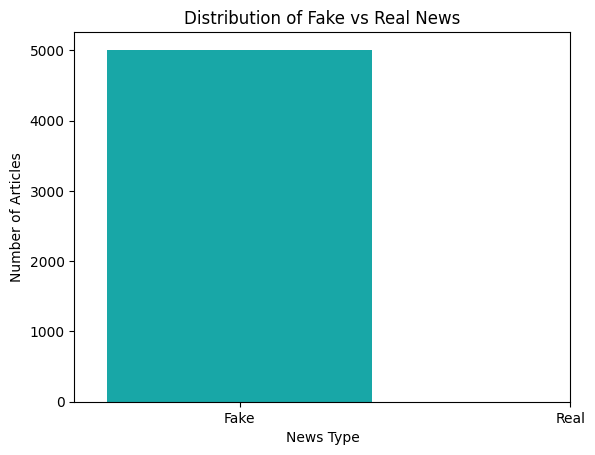

In [ ]:
sns.countplot(x='label', data=data, color='c')
plt.title("Distribution of Fake vs Real News")
plt.xlabel("News Type")
plt.ylabel("Number of Articles")
plt.xticks([0, 1], ['Fake', 'Real'])
plt.show()

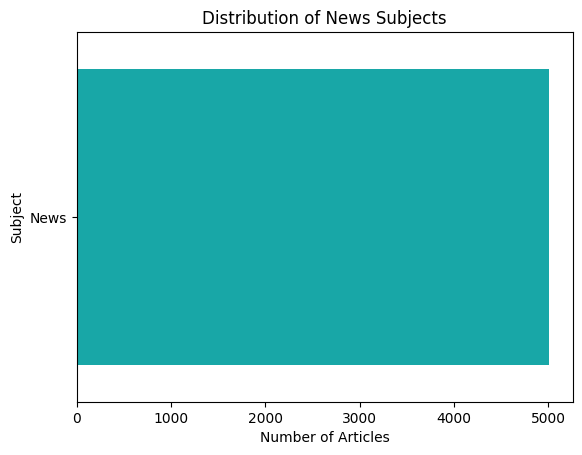

In [ ]:
sns.countplot(y='subject', data=data, color='c')
plt.title("Distribution of News Subjects")
plt.xlabel("Number of Articles")
plt.ylabel("Subject")

plt.show()

Text(0, 0.5, 'Number of Articles')

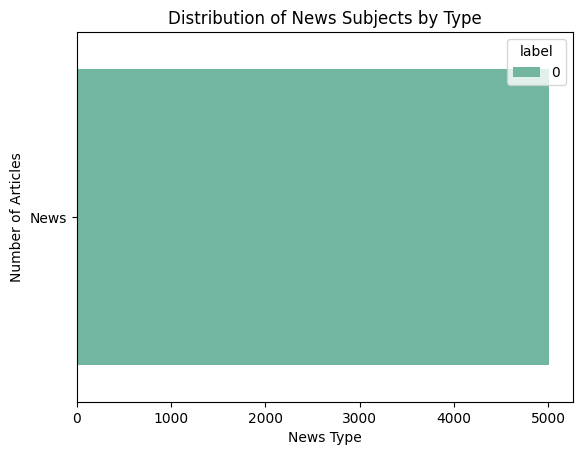

In [ ]:
sns.countplot(y='subject', hue='label', data=data, palette='Set2')
plt.title("Distribution of News Subjects by Type")
plt.xlabel("News Type")
plt.ylabel("Number of Articles")

In [ ]:
data['text_length'] = data['text'].str.len()

In [ ]:
data['text_length'].head().reset_index()

,index,text_length
0,0,2893
1,1,1898
2,2,3597
3,3,2774
4,4,2346


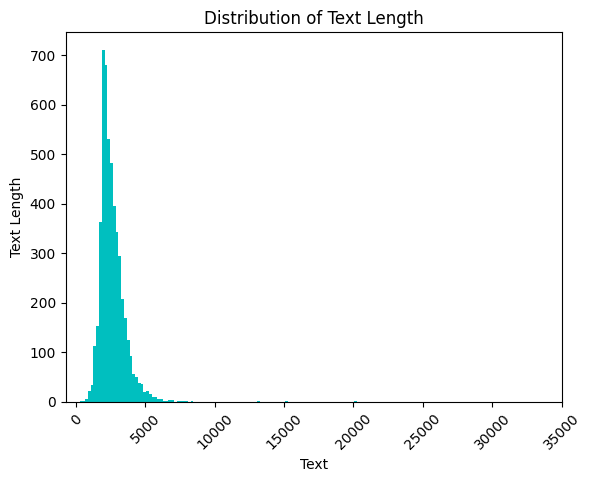

In [ ]:
plt.hist(data['text_length'],bins= 100, color='c')
plt.title("Distribution of Text Length")
plt.xlabel("Text")
plt.ylabel("Text Length")
plt.xticks(np.arange(0, 40000, 5000),rotation=45)
plt.show()

In [ ]:
data.columns

Index(['title', 'text', 'subject', 'date', 'label', 'id', 'author',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6',
       ...
       'Unnamed: 738', 'Unnamed: 739', 'Unnamed: 740', 'Unnamed: 741',
       'Unnamed: 742', 'Unnamed: 743', 'Unnamed: 744', 'Unnamed: 745',
       'Unnamed: 746', 'text_length'],
      dtype='object', length=751)

In [ ]:
data['text'] = data['text'].apply(clean_word)

In [ ]:
data['text'].reset_index()

,index,text
0,0,donald trump just couldn t wish all americans ...
1,1,house intelligence committee chairman devin nu...
2,2,on friday it was revealed that former milwauk...
3,3,on christmas day donald trump announced that ...
4,4,pope francis used his annual christmas day mes...
...,...,...
5004,5004,so if natural disasters are sent by god to pun...
5005,5005,the new head of donald trump s presidential ca...
5006,5006,the man who wrote the speech for patricia smit...
5007,5007,what just happened on cnn would be sad if it w...


# Split data

In [ ]:
x = data['text']
y =data['label']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 45,test_size = 0.3)

# Converts a collection of text documents into a matrix of TF-IDF features

In [ ]:
# class in scikit-learn that converts a collection of text documents into a matrix of TF-IDF features
vectorization = TfidfVectorizer()

# earn the vocabulary and TF-IDF values from the training set and transform the text into TF-IDF vectors for the training data
xv_train = vectorization.fit_transform(x_train)

# use the previously learned vocabulary and IDF values from the training set to transform the test data into TF-IDF vectors
xv_test = vectorization.transform(x_test)

# Train and Test Data in ML Models


In [ ]:
print("Unique classes in y_train:", y_train.unique())
print("Class distribution in y_train:\n", y_train.value_counts())

Unique classes in y_train: [0]
Class distribution in y_train:
 label
0    3506
Name: count, dtype: int64


In [ ]:
print(y.value_counts())

label
0    5009
Name: count, dtype: int64


In [ ]:
fake = fake_data.sample(n=1000)
real = real_data.sample(n=1000)

data = pd.concat([fake, real]).sample(frac=1, random_state=42)


 accuracy_score = 1.0 

confusion_matrix = 
 [[1503]]

classification_report = 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1503

    accuracy                           1.00      1503
   macro avg       1.00      1.00      1.00      1503
weighted avg       1.00      1.00      1.00      1503



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


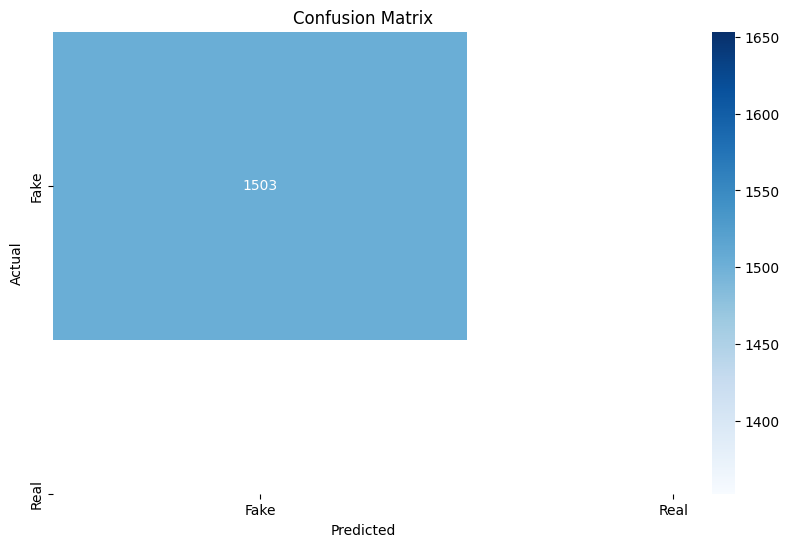

In [ ]:
train_test_model (DecisionTreeClassifier(),xv_train,xv_test,y_train,y_test)